In [12]:
import requests
import spotipy
from requests.auth import HTTPBasicAuth
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint

In [13]:
from client import client_id
from client import client_secret

In [14]:
top_artist_df = pd.read_csv("top2018.csv")
top_artist_df.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7,-9.211,1,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973,4
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8,-4.880,1,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606,4
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5,-6.090,0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147,4
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8,-8.011,1,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440,4
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1,-5.833,1,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925,4


In [15]:
token_url = "https://accounts.spotify.com/api/token"
headers = {'content-type': 'application/x-www-form-urlencoded'}

token_params = {"grant_type" : "client_credentials"}

token_json = requests.post(token_url, params = token_params, headers = headers, auth = (client_id, client_secret)).json()
token = token_json['access_token']

token_json

{'access_token': 'BQAyZgKX9kYbZlYIdY_vuYg-vC2pHRsTInNSkJTSRtEf3jic5wI7LNLXQYOAAZS5PIMCn_KE5YjeQJdRrM8',
 'token_type': 'Bearer',
 'expires_in': 3600,
 'scope': ''}

In [16]:
token_headers = {'authorization': f"Bearer {token}"}

artist_name_list = []
artist_id_list = []
artist_followers_list = []
genre_list = []
genre_popularity = []

search_url = "https://api.spotify.com/v1/search"

print("----------------------\nRetrieving Artist ID\n----------------------")

for artist in top_artist_df["artists"]: #[:1]
    search_param = {"q" : artist,
                   "type" : "artist",
                   "limit" : 1}
    
    try:
        artist_json = requests.get(search_url, params = search_param, headers = token_headers).json()
#         pprint(artist_json)
        artist_id = artist_json["artists"]["items"][0]["id"]
        artist_name = artist_json["artists"]["items"][0]["name"]
        artist_follower = artist_json["artists"]["items"][0]["followers"]["total"]
        genres = artist_json["artists"]["items"][0]["genres"]
        
        if artist_id not in artist_id_list:
            artist_id_list.append(artist_id)
            artist_name_list.append(artist_name)
            artist_followers_list.append(artist_follower)
            
            for genre in genres:
                if genre not in genre_list:
                    genre_list.append(genre)
                    genre_popularity.append(1)
                    
                else:
                    genre_popularity[genre_list.index(genre)] += 1
                
            print(f"Artist ID Found | {artist_id} | {artist_name}")
            
        else:
            print("Artist ID in list already")
        
    except IndexError:
        print("Could Not Find Artist ID")

----------------------
Retrieving Artist ID
----------------------
Artist ID Found | 3TVXtAsR1Inumwj472S9r4 | Drake
Artist ID Found | 15UsOTVnJzReFVN1VCnxy4 | XXXTENTACION
Artist ID Found | 246dkjvS1zLTtiykXe5h60 | Post Malone
Artist ID in list already
Artist ID in list already
Artist ID in list already
Artist ID Found | 4kYSro6naA4h99UJvo89HB | Cardi B
Artist ID Found | 7CajNmpbOovFoOoasH2HaY | Calvin Harris
Artist ID Found | 6M2wZ9GZgrQXHCFfjv46we | Dua Lipa
Artist ID Found | 64KEffDW9EtZ1y2vBYgq8T | Marshmello
Artist ID Found | 4nDoRrQiYLoBzwC5BhVJzF | Camila Cabello
Artist ID Found | 4MCBfE4596Uoi2O4DtmEMz | Juice WRLD
Artist ID in list already
Artist ID Found | 04gDigrS5kc9YWfZHwBETP | Maroon 5
Artist ID Found | 2qxJFvFYMEDqd7ui6kSAcq | Zedd
Artist ID Found | 2YZyLoL8N0Wb9xBt1NhZWg | Kendrick Lamar
Artist ID Found | 66CXWjxzNUsdJxJ2JdwvnR | Ariana Grande
Artist ID Found | 1SupJlEpv7RS2tPNRaHViT | Nicky Jam
Artist ID in list already
Artist ID Found | 4TEJudQY2pXxVHPE3gD2EU | BlocBo

In [24]:
genre_popularity_df = pd.DataFrame({
    "Genre" : genre_list,
    "Genre Count" : np.array(genre_popularity)
})

genre_popularity_df["Genre Percentage"] = (genre_popularity_df["Genre Count"]/genre_popularity_df["Genre Count"].sum()) * 100

genre_popularity_df.head()

,Genre,Genre Count,Genre Percentage
0,canadian hip hop,1,0.403226
1,canadian pop,3,1.209677
2,hip hop,9,3.629032
3,pop rap,9,3.629032
4,rap,18,7.258065


Text(0.5,1,'Top Artist Genre of 2018')

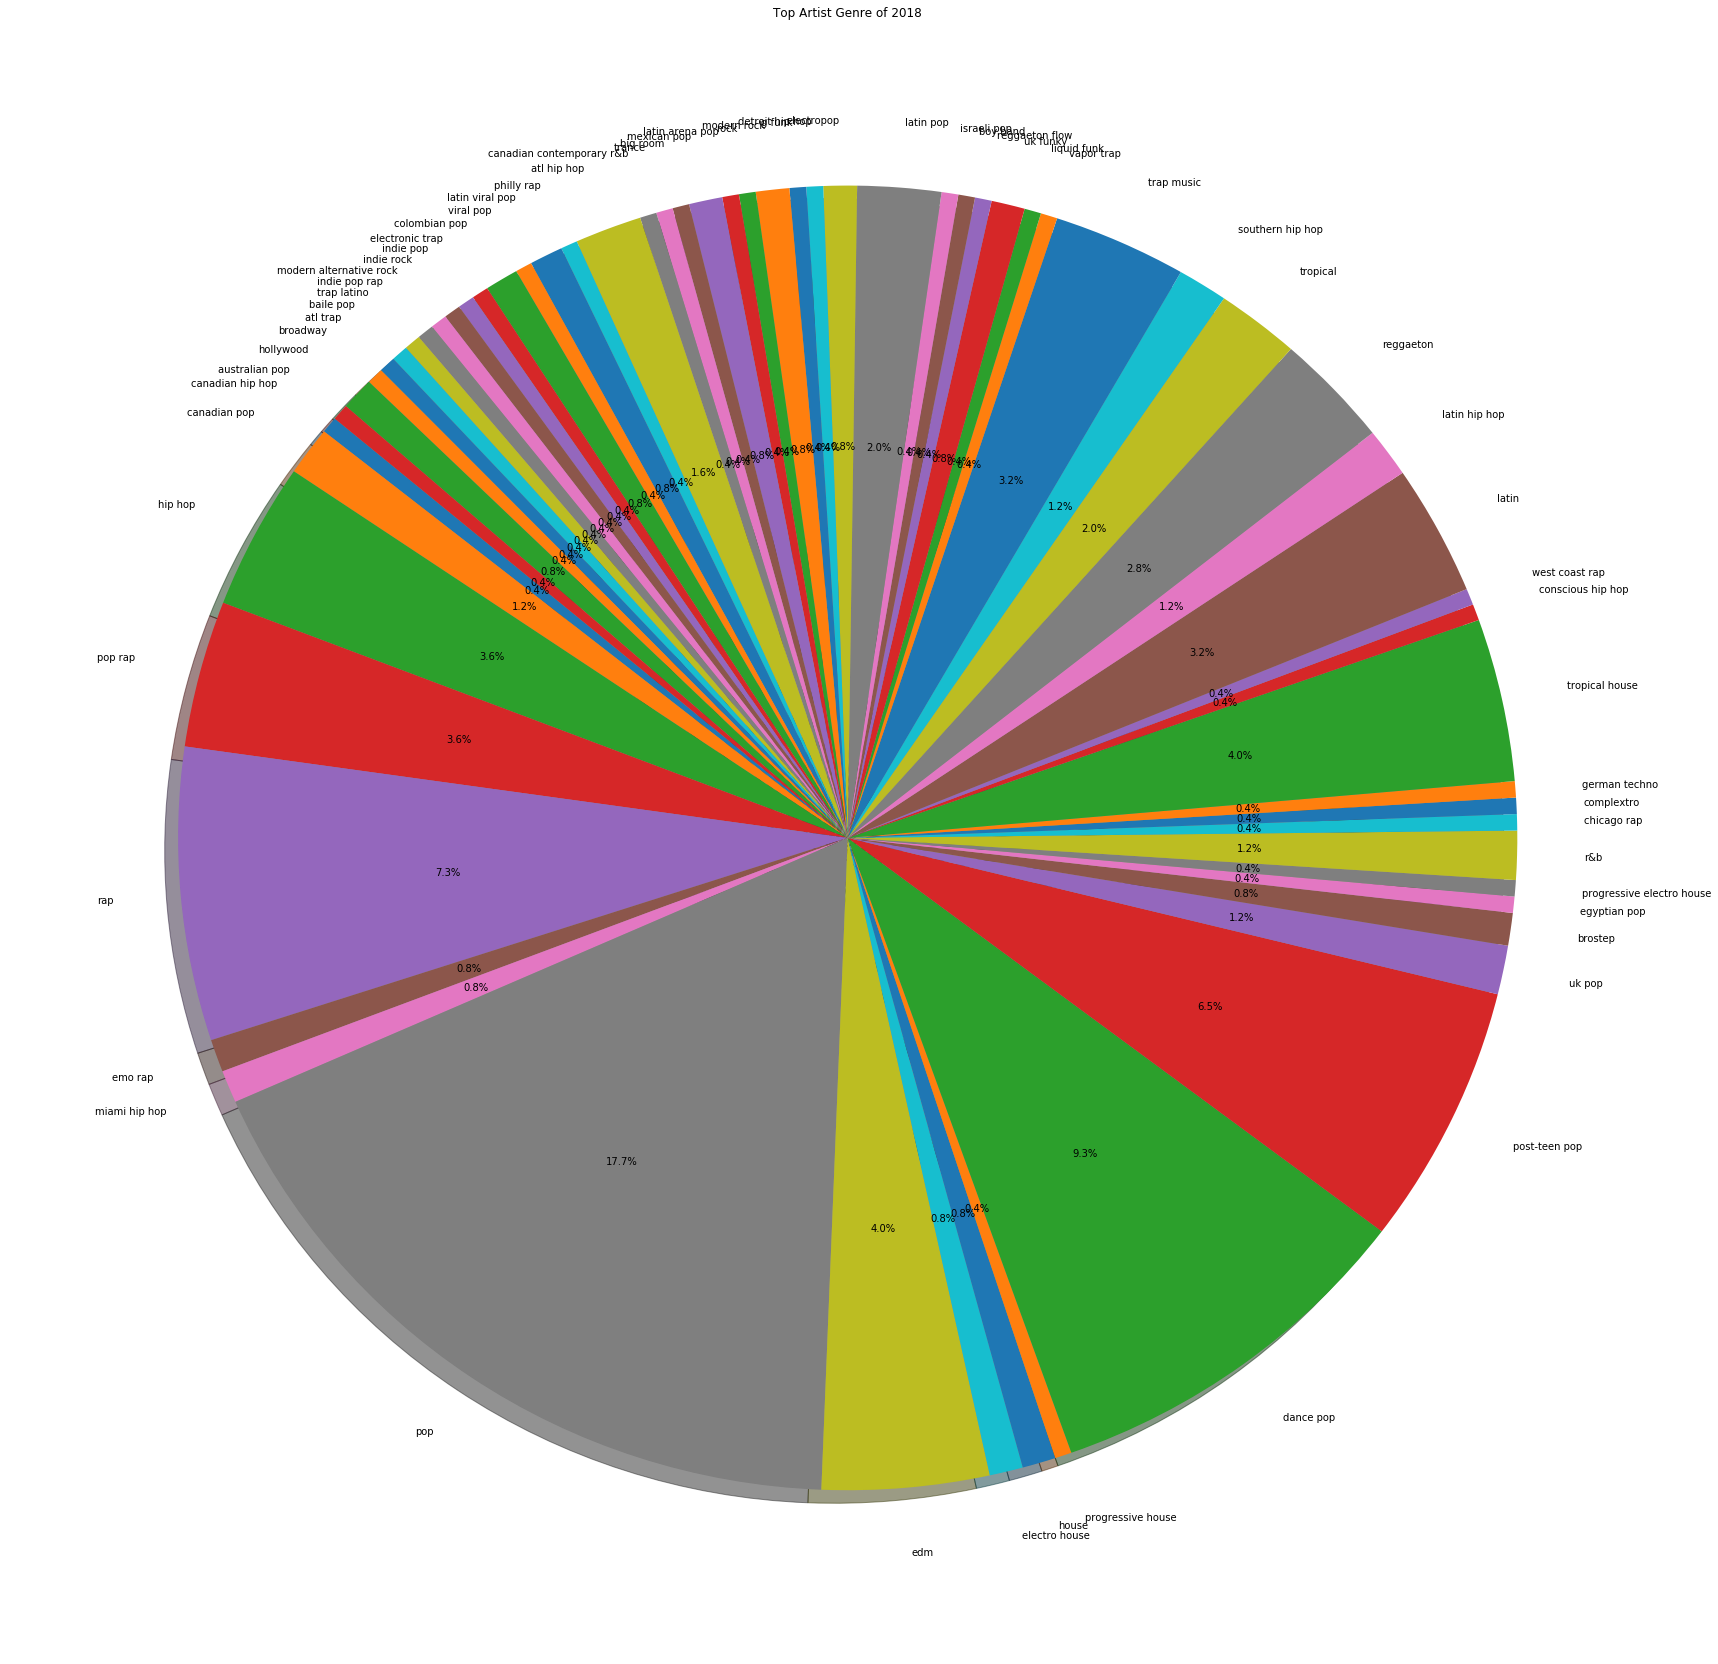

In [30]:
plt.figure(figsize=(30,30))


plt.pie(genre_popularity_df["Genre Percentage"], labels = genre_list,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Top Artist Genre of 2018")

In [6]:
###ARTIST EXAMPLE###
# artist_url = "https://api.spotify.com/v1/artists/"

# pprint(requests.get(artist_url + "7CajNmpbOovFoOoasH2HaY", headers = token_headers).json())

In [7]:
###TRACKS EXAMPLE###
# track_url = "https://api.spotify.com/v1/tracks/"

# pprint(requests.get(track_url + "2G7V7zsVDxg1yRsu7Ew9RJ", headers = token_headers).json())